# Clasificador de sobrevivientes del Titanic.

El presente Jupyter Notebook, nos presenta el tipico flujo de trabajo que deberemos desarrollar en proyectos de Analisis de datos; por lo tanto, se presentarán todos los pasos a seguir en un proyecto real.

## Fases del flujo de trabajo.

Inicialmente, el flujo de trabajo que comprende el analisis de datos consta de 7 pasos:

- Definición del problema
- Adquisicion de datos
- Preparación de datos (limpieza)
- Analisis exploratorio (EDA)
- Modelación y resolución del problema
- Visualizacion de datos y redaccion del reporte (Informes, canvas, planillas, etc.)
- Presentación de resultados.

Si bien, inicialmente esto se presenta de forma secuencial; en realidad presenta un esquema ciclico en el que pueden interactuar varias fases entre si, tal como se presenta en la Fig. :
<img src=https://www.tibco.com/sites/tibco/files/media_entity/2019-03/data_science-diagram.svg >





### Definicion del problema

Desde la competicion de [Kaggle](https://www.kaggle.com/competitions/titanic) se nos presenta de forma explicita cual es el problema a resolver, en este caso se pretende a partir de un set de entrenamiento que contiene pasajeros que sobrevivieron o fallecieron en el accidente del Titanic, en base a este se pretende desarrollar un modelo que determine si los pasajeros del test de prueba sobreviven o no al accidente. Adicionalmente es importante para todo proyecto conocer un poco del transfondo del problema donde, para este caso en concreto tenemos:

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Objetivos del flujo de trabajo

La solución del flujo de trabajo resuelve 7 objetivos principales:

- Clasificación
- Correlación
- Conversión de datos a variables numericas
- Completación de elementos faltantes 
- Corrección de outliers
- Creación de nuevos atributos en base a los ya existentes
- Seleccion de Graficos/visualización correcta

### Adquisición de datos y librerias

Podemos adquirir directamente los datos de Kaggle utilizando su API o descargando sus datos (más facil), Adicionalmente se cargaran sus librerias que como veran con el tiempo, muchas de estas se repetiran en sus proyectos.

In [64]:
# Analisis de datos
import pandas as pd
import numpy as np
import random as rnd

# Visualizacion

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Definicion de los datasets

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [65]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [66]:
# Que contienen los datos?
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
# tamaño de los datos?
train_df.shape

(891, 12)

In [68]:
# Nulos, existen? cuantos?
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Se observan que faltan datos en edad, cabina y embarque

In [69]:
# distribucion de las variables numericas
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
# Comportamiento de las variables categoricas
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Posteriormente, debemos realizar el estudio en base a nuestras variables objetivo; en este caso nos interesa saber si sobrevive el pasajero (0 = No sobrevive, 1 = Sobrevive) y su ID

In [71]:
train_df.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

Adicionalmente, podemos ver la variable objetivo vs el sexo del pasajero, para lograr identificar alguna correlacion.

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

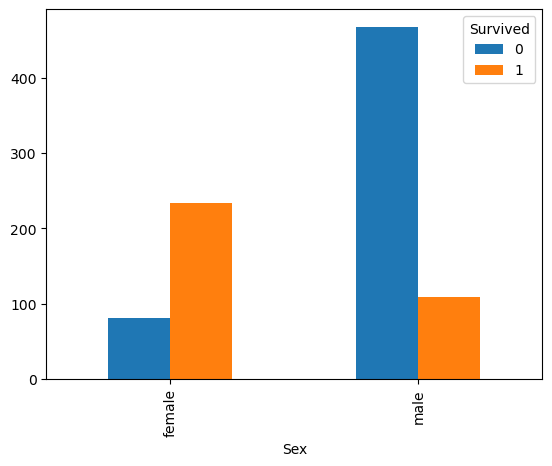

In [72]:
grouped_sex= train_df.groupby(['Survived','Sex']).count()['PassengerId']
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar())           #Unstack cuadricula los datos
plt.show

Por ultimo podemos ver la relacion entre el embarque y y la clase del pasajero

AxesSubplot(0.125,0.11;0.775x0.77)


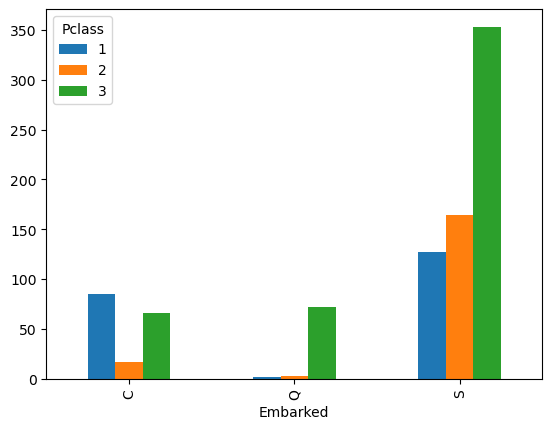

In [73]:
print(train_df.groupby(['Pclass','Embarked']).count()['PassengerId'].unstack(level = 0).plot.bar())

Esto lo podemos hacer mas facilmente utilizando la matriz de correlacion, sin embargo debemos estandarizar la variable sexo

In [74]:
train_df['Sex'] = train_df['Sex'].map({'female':1, 'male':0}).astype(int)


In [75]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

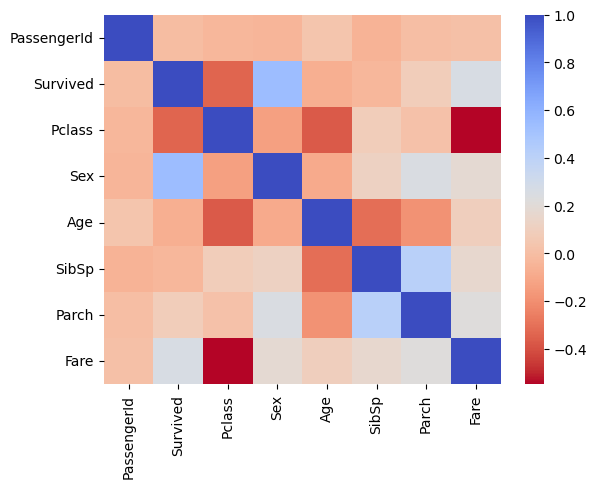

In [76]:
corr = train_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

Donde tal como vimos con anterioridad, se presenta una correlacion entre el genero de la persona y su estatus.

### Preparacion y procesamiento de los datos

Comenzamos seleccionando las variables que consideramos de interes (Las que se obtienen del EDA) como lo son:

- Survived
- Pclass
- Age
- Sex

In [77]:
train = train_df[['Survived','Sex','Age','Pclass']]
train.head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


In [78]:
# Datos nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 24.5 KB


Dado que anteriormente transformamos la variable sexo a numerico, solo se nos presenta el problema de los valores nulos en la edad, para esto podemos utilizar el método .isna()

In [79]:
(train_df[train_df['Age'].isna()].groupby(['Sex','Pclass']).count()['PassengerId'].unstack(level=0))

Sex,0,1
Pclass,,
1,21,9
2,9,2
3,94,42


Se observa que mayoritariamente son hombres de 3ra clase quienes no registraron su edad

In [80]:
(train_df[train_df['Age'].isna()].groupby(['SibSp','Parch']).count()['PassengerId'].unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


Se observa que las personas que viajaban solas pueden presentar algun tipo de valor para el estudio

In [81]:
# Para reemplazar los valores nulos, se pueden utilizar diferentes tecnicas, en nuestro caso reemplazaremos estos valores por la mediana
train_df['Age'].median()

28.0

In [82]:
#reemplazamos el valor

train['Age'] = train['Age'].fillna(28.0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 24.5 KB


C:\Users\Camilo\AppData\Local\Temp\ipykernel_1660\225447880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train['Age'].fillna(28.0)
